# 图像基本操作

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
src1 = cv2.imread('../datas/f2.jpg')
rgb1 = cv2.cvtColor(src1,cv2.COLOR_BGR2RGB)
gray1 = cv2.cvtColor(src1,cv2.COLOR_BGR2GRAY)
rgb_f1 = rgb1.astype(np.float32)

src2 = cv2.imread('../datas/f4.jpg')
rgb2 = cv2.cvtColor(src2,cv2.COLOR_BGR2RGB)
gray2 = cv2.cvtColor(src2,cv2.COLOR_BGR2GRAY)
rgb_f2 = rgb2.astype(np.float32)

## 1.图像乘除加减

Text(0.5,1,'Image Add')

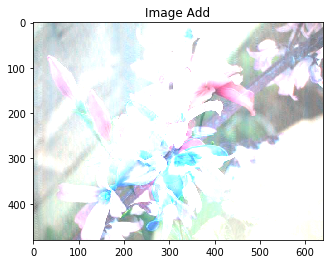

In [3]:
dst = cv2.add(src1,src2)
plt.imshow(dst)
plt.title('Image Add')

Text(0.5,1,'Image Add Weighted')

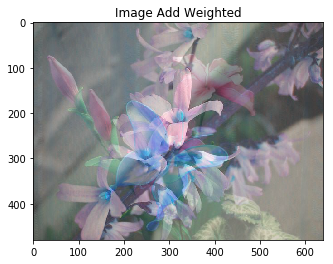

In [4]:
dst = cv2.addWeighted(src1,0.55,src2,0.45,2.4)
plt.imshow(dst)
plt.title('Image Add Weighted')

Text(0.5,1,'Substract')

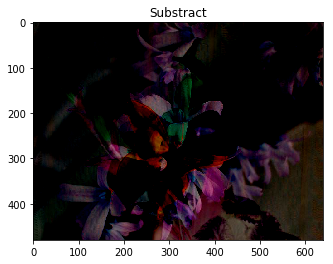

In [5]:
dst = cv2.subtract(src1,src2)
plt.imshow(dst)
plt.title('Substract')

float32 float32 float32
(280, 400, 3) (280, 400)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Text(0.5,1,'Multiply')

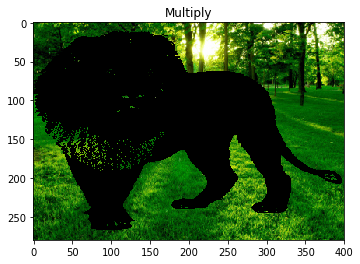

In [6]:
img_cat = cv2.imread('../datas/cat.png', cv2.IMREAD_UNCHANGED)
img_cat = cv2.cvtColor(img_cat,cv2.COLOR_BGRA2RGB)

img_park = cv2.imread('../datas/park.jpg')
img_park = cv2.cvtColor(img_park,cv2.COLOR_BGR2RGB)
fy = img_park.shape[0]/img_cat.shape[0]
fx =  img_park.shape[1]/img_cat.shape[1]
img_cat = cv2.resize(img_cat, None, fx=fx, fy=fy)
ret, mask = cv2.threshold(img_cat[:,:,2], 1, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

img_cat = img_cat.astype(np.float32) / 255.0
img_park = img_park.astype(np.float32) / 255.0
mask = mask.astype(np.float32) / 255.0
print(img_cat.dtype,img_park.dtype,mask.dtype)

cat_mask_r = cv2.multiply(img_cat[:,:,0],mask)
cat_mask_g = cv2.multiply(img_cat[:,:,1],mask)
cat_mask_b = cv2.multiply(img_cat[:,:,2],mask)
# cat_mask_r = cv2.multiply(img_cat[:,:,0],mask)
print(img_park.shape,mask.shape)
background_r = cv2.multiply(img_park[:,:,0].copy(),(255-mask))
background_g = cv2.multiply(img_park[:,:,1].copy(),(255-mask))
background_b = cv2.multiply(img_park[:,:,2].copy(),(255-mask))

cat_mask = cv2.merge([cat_mask_r,cat_mask_g,cat_mask_b])
background = cv2.merge([background_r,background_g,background_b])
# dst = cv2.add(cat_mask,background)
dst = np.zeros_like(background)
idx = (mask > 0)
print(mask)
dst[idx] = img_cat[idx]
dst[~idx] = background[~idx]
dst[dst > 255] = 255
dst = dst.astype(np.uint8)

plt.imshow(dst,'gray')
plt.title('Multiply')

## 2.图像位操作

Text(0.5,1,'Bitwise')

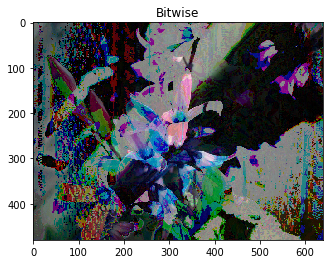

In [7]:
dst = cv2.bitwise_and(src1,src2)
plt.imshow(dst)
plt.title('Bitwise')

Text(0.5,1,'Bitwise Or')

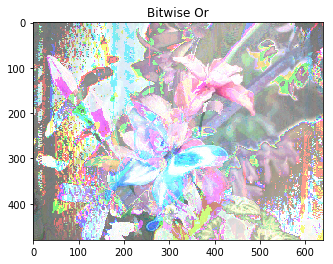

In [8]:
dst = cv2.bitwise_or(src1,src2)
plt.imshow(dst)
plt.title('Bitwise Or')

Text(0.5,1,'Bitwise xor')

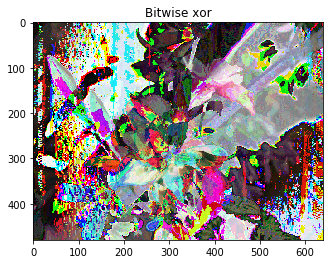

In [9]:
dst = cv2.bitwise_xor(src1,src2)
plt.imshow(dst)
plt.title('Bitwise xor')

Text(0.5,1,'Bitwise Not')

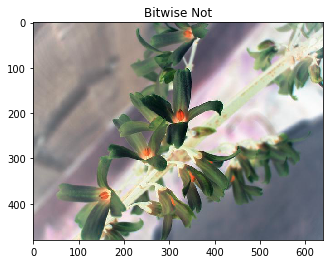

In [10]:
dst = cv2.bitwise_not(src1)
plt.imshow(dst)
plt.title('Bitwise Not')

## 3.图像混合

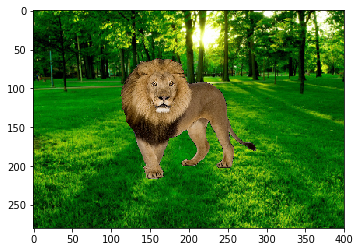

In [11]:
img_cat = cv2.imread('../datas/cat.png', cv2.IMREAD_UNCHANGED)
img_cat = cv2.cvtColor(img_cat,cv2.COLOR_BGRA2RGBA)
img_cat = cv2.resize(img_cat, None, fx=0.3, fy=0.3)
img_park = cv2.imread('../datas/park.jpg')
img_park = cv2.cvtColor(img_park,cv2.COLOR_BGR2RGB)
ret, mask = cv2.threshold(img_cat[:,:,3], 1, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
cat_h, cat_w = img_cat.shape[:2]
park_h, park_w = img_park.shape[:2]

img = cv2.cvtColor(img_cat, cv2.COLOR_BGRA2BGR)
(roi_y, roi_x) = park_h//2-cat_h//2, park_w//2-cat_w//2
park_roi = img_park[roi_y:roi_y+cat_h, roi_x:roi_x+cat_w ]
masked_cat = cv2.bitwise_and(img, img, mask=mask)
masked_park = cv2.bitwise_and(park_roi, park_roi, mask=mask_inv)
added = masked_cat + masked_park
img_park[roi_y:roi_y+cat_h, roi_x:roi_x+cat_w] = added

plt.imshow(img_park)

## 4.颜色范围选择

Text(0.5,1,'Yellow')

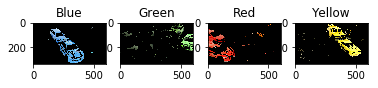

In [12]:
file_name = "../datas/rgb_car.jpg"
img = cv2.imread(file_name)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

blue1 = np.array([90, 50, 50])
blue2 = np.array([120, 255,255])

green1 = np.array([45, 50,50])
green2 = np.array([75, 255,255]);
    
red1 = np.array([0, 50,50])
red2 = np.array([15, 255,255]);

yellow1 = np.array([20, 50,50])
yellow2 = np.array([35, 255,255]);


mask_blue = cv2.inRange(hsv, blue1, blue2)
# print(np.where([mask_blue!=0]))
mask_green = cv2.inRange(hsv, green1, green2)
mask_red = cv2.inRange(hsv, red1, red2)
mask_yellow = cv2.inRange(hsv, yellow1, yellow2)

res_blue = cv2.cvtColor(cv2.bitwise_and(img, img, mask=mask_blue),cv2.COLOR_BGR2RGB)
res_green = cv2.cvtColor(cv2.bitwise_and(img, img, mask=mask_green),cv2.COLOR_BGR2RGB)
res_red = cv2.cvtColor(cv2.bitwise_and(img, img, mask=mask_red),cv2.COLOR_BGR2RGB)
res_yellow = cv2.cvtColor(cv2.bitwise_and(img, img, mask=mask_yellow),cv2.COLOR_BGR2RGB)

plt.subplot(141)
plt.imshow(res_blue)
plt.title('Blue')
plt.subplot(142)
plt.imshow(res_green)
plt.title('Green')
plt.subplot(143)
plt.imshow(res_red)
plt.title('Red')
plt.subplot(144)
plt.imshow(res_yellow)
plt.title('Yellow')